# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
# Imports
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [2]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Extração e Transformação de Dados

In [4]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df.assign(especie = '')
df['especie'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie,valores
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [19]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df['valores'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie,valores
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [25]:
# Extraia as features (atributos) do dataset e imprima 
features = df.columns[:4]
print(features)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [81]:
# Calcule a média de cada feature para as 3 classes
setosa = []
versicolor =[]
virginica = []

s1 = df.loc[df['especie'] == 'setosa']
s2 = setosa.append(np.mean(s1['sepal length (cm)'].values))

s1 = df.loc[df['especie'] == 'setosa']
s2 = setosa.append(np.mean(s1['sepal width (cm)'].values))

s1 = df.loc[df['especie'] == 'setosa']
s2 = setosa.append(round(np.mean(s1['petal length (cm)'].values), 2))

s1 = df.loc[df['especie'] == 'setosa']
s2 = setosa.append(round(np.mean(s1['petal width (cm)'].values),2))

v1 = df.loc[df['especie'] == 'versicolor']
v2 = versicolor.append(round(np.mean(v1['sepal length (cm)'].values),2))

v1 = df.loc[df['especie'] == 'versicolor']
v2 = versicolor.append(round(np.mean(v1['sepal width (cm)'].values),2))

v1 = df.loc[df['especie'] == 'versicolor']
v2 = versicolor.append(round(np.mean(v1['petal length (cm)'].values),2))

v1 = df.loc[df['especie'] == 'versicolor']
v2 = versicolor.append(round(np.mean(v1['petal width (cm)'].values),2))


s1 = df.loc[df['especie'] == 'virginica']
s2 = virginica.append(np.mean(s1['sepal length (cm)'].values))
s1 = df.loc[df['especie'] == 'virginica']
s2 = virginica.append(np.mean(s1['sepal width (cm)'].values))
s1 = df.loc[df['especie'] == 'virginica']
s2 = virginica.append(np.mean(s1['petal length (cm)'].values))
s1 = df.loc[df['especie'] == 'virginica']
s2 = virginica.append(np.mean(s1['petal width (cm)'].values))

print(setosa)
print(versicolor)
print(virginica)

# Todo esse codigo poderia se simplificado por groupby(coluna).mean(). https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

df.groupby('especie').mean()

[5.006, 3.428, 1.46, 0.25]
[5.94, 2.77, 4.26, 1.33]
[6.587999999999998, 2.974, 5.5520000000000005, 2.0260000000000002]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),valores
especie,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


## Exploração de Dados

In [84]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
# np.transpose faz a matriz transposta

# caso eu quizesse fazer isso com o resultado anterior : np.transpose(df.groupby('especie').mean())

np.transpose(df)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
especie,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
valores,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [85]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   especie            150 non-null    category
 5   valores            150 non-null    int32   
dtypes: category(1), float64(4), int32(1)
memory usage: 5.7 KB


In [87]:
# Faça um resumo estatístico do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),valores
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [89]:
# Verifique se existem valores nulos no dataset

# Aqui chamamos isnull para procuar valores nulos e .sum() para soma-los, como não há, então a soma é zero
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
especie              0
valores              0
dtype: int64

In [104]:
# Faça uma contagem de valores de sepal length
import collections
repetidos = collections.Counter(df['sepal length (cm)'].values)
print(repetidos)

# Outra forma de fazer isto é usando o seguinte codigo

df['sepal length (cm)'].value_counts()

Counter({5.0: 10, 5.1: 9, 6.3: 9, 5.7: 8, 6.7: 8, 5.8: 7, 5.5: 7, 6.4: 7, 4.9: 6, 5.4: 6, 6.0: 6, 6.1: 6, 5.6: 6, 4.8: 5, 6.5: 5, 4.6: 4, 5.2: 4, 6.9: 4, 6.2: 4, 7.7: 4, 4.4: 3, 5.9: 3, 6.8: 3, 7.2: 3, 4.7: 2, 6.6: 2, 4.3: 1, 4.5: 1, 5.3: 1, 7.0: 1, 7.1: 1, 7.6: 1, 7.3: 1, 7.4: 1, 7.9: 1})


5.0    10
6.3     9
5.1     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
6.2     4
5.2     4
7.7     4
6.9     4
4.6     4
7.2     3
5.9     3
4.4     3
6.8     3
6.6     2
4.7     2
7.1     1
7.4     1
7.6     1
7.9     1
4.5     1
7.0     1
5.3     1
7.3     1
4.3     1
Name: sepal length (cm), dtype: int64

## Plot

Text(0, 0.5, 'Amostras')

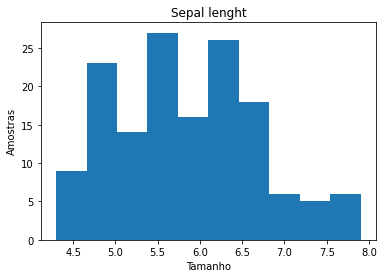

In [119]:
# Crie um Histograma de sepal length

fig, ax = plt.subplots(1, 1)
ax.hist(df['sepal length (cm)'])
  
# Set title
ax.set_title("Sepal lenght")
  
# adding labels
ax.set_xlabel('Tamanho')
ax.set_ylabel('Amostras')






In [ ]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target


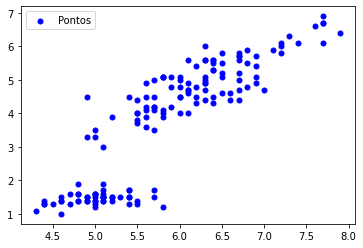

In [136]:
# Crie um Scatter Plot de 2 Features (atributos)
f1 = df['sepal length (cm)'].values
f2 = df['petal length (cm)'].values


plt.scatter(f1, f2, label = 'Pontos', color = 'b', marker = 'o', s = 25)

plt.legend()
plt.show()


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

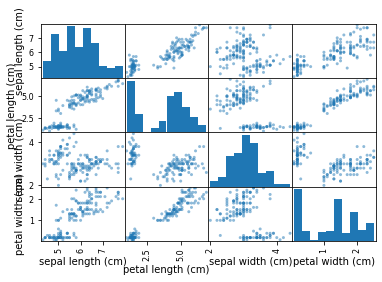

In [142]:
# Crie um Scatter Matrix das Features (atributos)

# Separei os atributos numa lista primeiramente, em seguida chamei cada objeto dessa lista para o dataframe
atributos = ['sepal length (cm)', 'petal length (cm)', 'sepal width (cm)', 'petal width (cm)']
pd.plotting.scatter_matrix(df[atributos])

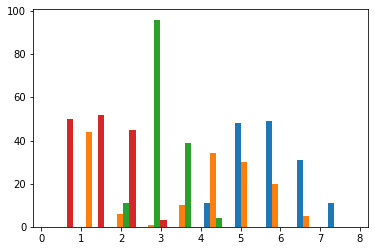

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

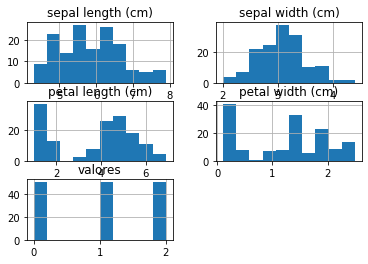

In [145]:
# Crie um Histograma de todas as features
plt.hist(df[atributos])
plt.show()


df.hist()

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>